# WASSA2023

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


## Dependencies

In [3]:
repo_path = "https://raw.githubusercontent.com/HLT-Ghisolfi-Leuzzi-Testa/WASSA-2023/"
branch = "main"

In [3]:
!pip install transformers -q
!pip install accelerate -U -q
!pip install datasets -q
!pip install torch-summary -q
!pip install graphviz -q
!pip install torchview -q
!pip install bertviz -q
!pip install NRCLex -q
!pip install textblob -q
!python -m textblob.download_corpora -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 120.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
utils_url = f"{repo_path}{branch}/utils.py"
evaluation_url = f"{repo_path}{branch}/evaluation.py"

import os
if os.path.exists("utils.py"):
  !rm "utils.py"
if os.path.exists("evaluation.py"):
  !rm "evaluation.py"

!wget {utils_url}
!wget {evaluation_url}

--2023-07-18 12:15:21--  https://raw.githubusercontent.com/HLT-Ghisolfi-Leuzzi-Testa/WASSA-2023/main/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38193 (37K) [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]  37.30K  --.-KB/s    in 0.003s  

2023-07-18 12:15:21 (10.9 MB/s) - ‘utils.py’ saved [38193/38193]

--2023-07-18 12:15:21--  https://raw.githubusercontent.com/HLT-Ghisolfi-Leuzzi-Testa/WASSA-2023/main/evaluation.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10675 (10K) [text/pl

In [5]:
import json
import torch
import string
from torch import nn
from torch.nn import BCEWithLogitsLoss
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoModel
from transformers import TrainingArguments, Trainer, TrainerCallback, EarlyStoppingCallback
from transformers import BertPreTrainedModel, BertModel
from transformers.modeling_outputs import SequenceClassifierOutput
import torch
from torch import nn
from transformers import AutoConfig, BertForSequenceClassification, RobertaForSequenceClassification, RobertaModel
from transformers.modeling_outputs import SequenceClassifierOutput
from typing import Optional, Union, Tuple
import importlib
import sys
from torch.utils.data import Dataset
from utils import *
importlib.reload(sys.modules['utils'])

<module 'utils' from '/content/utils.py'>

In [6]:
# set CUDA if available
if torch.cuda.is_available():
    device = torch.device('cuda')
    print("======= CUDA Available =======")
else:
    device = torch.device('cpu')
    print("======= CUDA NOT Available, run on CPU =======")

======= CUDA Available =======


## Set up

In [7]:
EMOTIONS_NAMES = [
    'fear',
    'anger',
    'anticipation',
    'trust',
    'surprise',
    'positive',
    'negative',
    'sadness',
    'disgust',
    'joy',
    'hope'
]

config = {}

In [8]:
#@title Task
TASK = "EMP" #@param ["EMO", "EMP"]

In [9]:
#@title Number of labels
num_labels = 2 #@param {type:"integer"}
config['num_labels'] = num_labels

In [10]:
#@title Model Class
model_id = 'roberta_baseline3' #@param {type:"string"}
model_class_string = "RobertaPreTrainedModel" #@param ["BertPreTrainedModel", "RobertaPreTrainedModel"]
model_name = 'roberta-base' #@param ["bert-base", "roberta-base", "roberta-emotion", "distilroberta-emotion", "roberta-empathy"]

if model_class_string == "BertPreTrainedModel":
  model_class = BertForSequenceClassification
else:
  model_class = RobertaForSequenceClassification

config['model_id'] = model_id
config['model_class_string'] = model_class_string
config['model_name'] = model_name

In [11]:
#@title Model configuration
train_batch_size = 8 #@param {type:"integer"}
val_batch_size = 8 #@param {type:"integer"}
learning_rate = 5e-5 #@param {type:"number"}
weight_decay = 0.08 #@param {type:"number"}
epochs = 30 #@param {type:"integer"}
patience = 6 #@param {type:"integer"}
dropout = 0.3 #@param {type:"number"}
weighted_loss = "None" #@param ["None", "normalized_inverse", "balanced"]

model_type ={
  'distilroberta-emotion':'j-hartmann/emotion-english-distilroberta-base',
  'roberta-emotion':'j-hartmann/emotion-english-roberta-large',
  'roberta-empathy': 'bdotloh/roberta-base-empathy',
  'bert-base': 'bert-base-cased',
  'roberta-base' : 'roberta-base'
}

model_config = {
    'model_id': model_id,
    'tokenizer_name': model_type.get(model_name),
    'model_name': model_type.get(model_name),
    'train_batch_size': train_batch_size,
    'val_batch_size': val_batch_size,
    'learning_rate': learning_rate,
    'weight_decay': weight_decay,
    'epochs': epochs,
    'seed': 42,
    'patience': patience,
    'early_stopping_threshold': 0,
    'weighted_loss': weighted_loss,
    'dropout' : dropout
}



In [12]:
path_tosave = f"{TASK}_{model_config['model_id']}"
!mkdir $path_tosave

config.update(model_config)
write_dict_to_json(config, f"{path_tosave}/config.json")

print("\nCONFIGURATION")
for k,v in config.items():
  print(f"{k}: {v}")


CONFIGURATION
num_labels: 2
model_id: roberta_baseline3
model_class_string: RobertaPreTrainedModel
model_name: roberta-base
tokenizer_name: roberta-base
train_batch_size: 8
val_batch_size: 8
learning_rate: 5e-05
weight_decay: 0.08
epochs: 30
seed: 42
patience: 6
early_stopping_threshold: 0
weighted_loss: None
dropout: 0.3


## Dataset

### WASSA dataset

In [40]:
class WASSADataset(Dataset):

    def __init__(
        self,
        tokenizer,
        essay,
        targets,
        max_len=None
        ):
        self.tokenizer = tokenizer
        self.max_len = max_len
        self.essay = essay
        self.targets = targets

    def __len__(self):
        return len(self.essay)

    def __getitem__(self, index):
        essay = str(self.essay[index])

        inputs = self.tokenizer.encode_plus(
            text=essay,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
            return_token_type_ids=True
        )

        item = {
          'input_ids': inputs['input_ids'].flatten(),
          'attention_mask': inputs['attention_mask'].flatten(),
          'token_type_ids': inputs["token_type_ids"].flatten()
        }

        if self.targets is not None:
          item['labels'] = torch.FloatTensor(self.targets[index])

        return item

Read dataframes

In [14]:
TRAIN_DATA = f"{repo_path}{branch}/datasets/WASSA23_essay_level_original_internal_train_preproc.tsv"
VAL_DATA = f"{repo_path}{branch}/datasets/WASSA23_essay_level_original_internal_val_preproc.tsv"
DEV_DATA = f"{repo_path}{branch}/datasets/WASSA23_essay_level_dev_preproc.tsv"

train_df = pd.read_csv(TRAIN_DATA, sep='\t')
val_df = pd.read_csv(VAL_DATA, sep='\t')
dev_df = pd.read_csv(DEV_DATA, sep='\t')

Encode targets

In [15]:
if TASK =="EMO":
  label_encoder = EmotionsLabelEncoder()
  label_encoder.fit(train_df.emotion)
  y_train = label_encoder.encode(train_df.emotion)
  y_val = label_encoder.encode(val_df.emotion)
  y_dev = label_encoder.encode(dev_df.emotion)

if TASK == "EMP":
  y_train = np.array(train_df[['empathy', 'distress']])
  y_val = np.array(val_df[['empathy', 'distress']])
  y_dev = np.array(dev_df[['empathy', 'distress']])

## Model

In [16]:
tokenizer = AutoTokenizer.from_pretrained(config.get('tokenizer_name'), truncation=True)
tokenizer

RobertaTokenizerFast(name_or_path='roberta-base', vocab_size=50265, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False)}, clean_up_tokenization_spaces=True)

In [17]:
if TASK == "EMO":
  problem_type = "multi_label_classification"
if TASK == "EMP":
  problem_type = "regression"

model = AutoModelForSequenceClassification.from_pretrained(config.get('model_name'),
                                                          problem_type = problem_type,
                                                          num_labels = config.get('num_labels'),
                                                          classifier_dropout = config.get('dropout'),
                                                          ignore_mismatched_sizes=True)
model

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should pr

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

## Training

Prepare datasets

In [18]:
train_set = WASSADataset(tokenizer=tokenizer,
                    essay=train_df.essay,
                    targets = y_train
                )

val_set = WASSADataset(tokenizer=tokenizer,
                    essay = val_df.essay,
                    targets = y_val
                )
dev_set = WASSADataset(tokenizer=tokenizer,
                    essay = dev_df.essay,
                    targets = y_dev
                )

Set up training

In [19]:
if TASK == "EMO":
  metric_for_val = "eval_macro_f1"
  compute_metrics_trainer = compute_EMO_metrics_trainer
if TASK == "EMP":
  metric_for_val = "eval_avg_pearson"
  compute_metrics_trainer = compute_EMP_metrics_trainer

In [20]:
train_arguments = TrainingArguments(
    output_dir=f"./{config.get('model_name')}",
    per_device_train_batch_size = config.get('train_batch_size'),
    per_device_eval_batch_size = config.get('val_batch_size'),
    num_train_epochs = config.get('epochs'),
    evaluation_strategy = "steps",
    save_strategy = "steps",
    logging_strategy = "steps",
    logging_steps = 150,
    eval_steps = 150,
    save_steps = 150,
    learning_rate=config.get('learning_rate'),
    weight_decay=config.get('weight_decay'),
    load_best_model_at_end=True,
    metric_for_best_model = metric_for_val,
    seed=config.get('seed'),
) # TODO: custom other params

In [21]:
trainer = Trainer(
    model=model,
    args=train_arguments,
    train_dataset=train_set,
    eval_dataset=val_set,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics_trainer
)

Callbacks

In [22]:
class TrainerLoggingCallback(TrainerCallback):
    def __init__(self, log_path):
        self.log_path = log_path

    def on_log(self, args, state, control, logs=None, **kwargs):
        _ = logs.pop("total_flos", None)
        if state.is_local_process_zero: # whether this process is the main one in a distributed setting
            with open(self.log_path, "a") as f:
                f.write(json.dumps(logs) + "\n")

trainer.add_callback(EarlyStoppingCallback(
    early_stopping_patience = config.get('patience'),
    early_stopping_threshold = config.get('early_stopping_threshold')))

trainer.add_callback(TrainerLoggingCallback(config.get('model_id')+"_log.json"))

Start training

In [ ]:
trainer.train()

In [24]:
# Access the training logs
train_logs = trainer.state.log_history

metrics = [list(log.keys())[:-5] for log in train_logs if log.get('eval_loss') is not None][0]

train_loss_values = []
eval_loss_values = []
eval_metrics_values = []
for _ in metrics:
  eval_metrics_values.append([])
train_epochs = []
eval_epochs = []

best_metric = 0
best_train_loss = float('inf')
best_eval_loss = float('inf')

for log in train_logs:

  if log.get(metric_for_val) is not None:

    if log.get(metric_for_val) > best_metric:
      best_metric = log.get(metric_for_val)
      best_steps = log.get('step')
      best_epoch_metric = log.get('epoch')
    if log.get('eval_loss') < best_eval_loss:
      best_eval_loss = log.get('eval_loss')
      best_epoch_eval_loss = log.get('epoch')

    for i, metric in enumerate(metrics):
      eval_metrics_values[i].append(log.get(metric))

    eval_loss_values.append(log.get('eval_loss'))
    eval_epochs.append(log.get('epoch'))

  if log.get('loss') is not None:
    if log.get('loss') < best_train_loss:
      best_train_loss = log.get('loss')

    train_loss_values.append(log.get('loss'))
    train_epochs.append(log.get('epoch'))


Plot losses

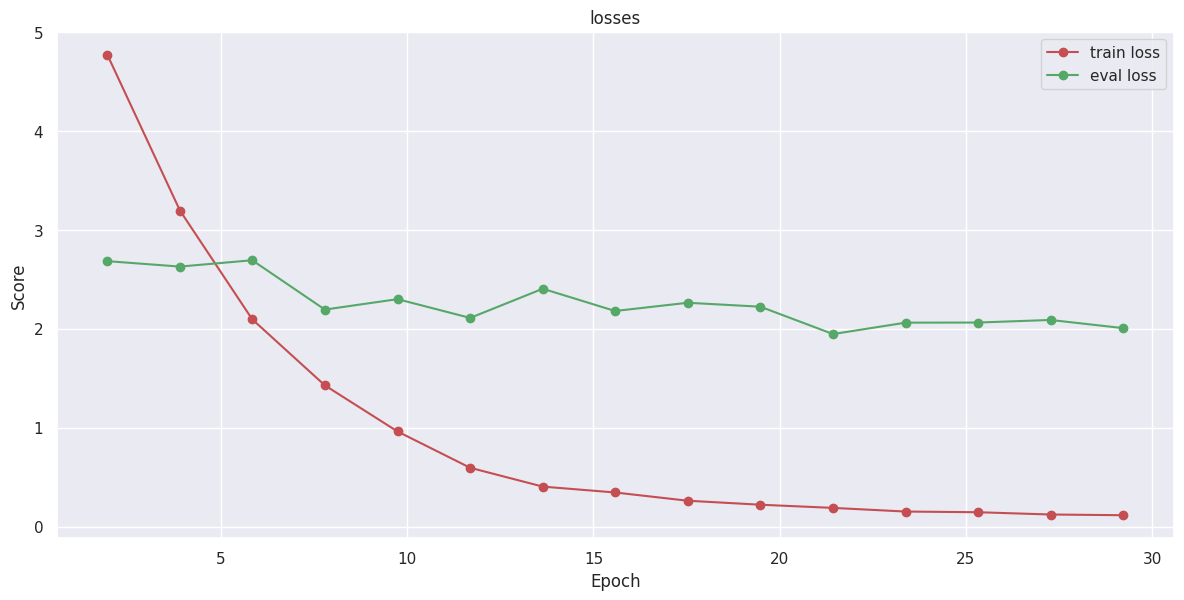

In [25]:
fig_name = "losses"
plot_metric_curve(
    values = [train_loss_values, eval_loss_values],
    epochs = [train_epochs, eval_epochs],
    metrics = ["train loss", "eval loss"],
    title = fig_name,
    path = f"{path_tosave}/{fig_name}.png")

Plot metrics

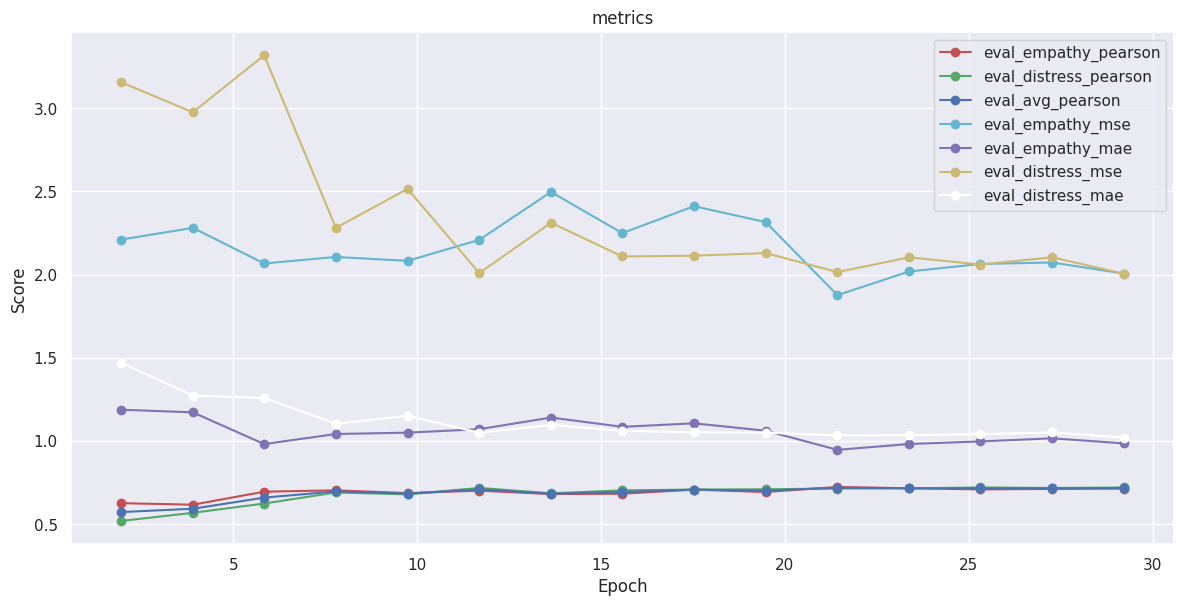

In [26]:
fig_name = "metrics"
plot_metric_curve(
    values = eval_metrics_values[1:],
    epochs = [eval_epochs for _ in eval_metrics_values[1:]],
    metrics = metrics[1:],
    title = fig_name,
    path = f"{path_tosave}/{fig_name}.png")

## Evaluation

In [27]:
def predict_emotions(results, gold_emotions):

  binarized_predictions = np.where(results >= 0.5, 1, 0)

  for i, bin_pred in enumerate(binarized_predictions):
    if np.all(bin_pred==0):
      binarized_predictions[i][np.argmax(results[i])] = 1

  predicted_emotions = label_encoder.decode(binarized_predictions)
  return predicted_emotions


In [28]:
print(trainer.state.best_model_checkpoint)

outs = trainer.predict(dev_set)

./roberta-base/checkpoint-1650


In [29]:
if TASK == "EMO":
  golds = label_encoder.decode(outs.label_ids)
  predictions = predict_emotions(outs.predictions, golds)
if TASK == "EMP":
  golds = outs.label_ids
  predictions = outs.predictions

In [30]:
path_predictions = f"{path_tosave}/predictions.tsv"
path_metrics = f"{path_tosave}/dev_metrics.json"

scores = {
    'train_loss': float(best_train_loss),
    'eval_loss': float(best_eval_loss)
}

write_predictions(predictions, path_predictions)
challenge_metrics = compute_metrics(golds=golds, predictions=predictions, task=TASK)
scores.update(challenge_metrics)
scores['best_metric'] = float(best_metric)
scores['best_epoch_metric'] = float(best_epoch_metric)
scores['best_epoch_eval_loss'] =  float(best_epoch_eval_loss)

write_dict_to_json(scores, path_metrics)

scores

{'train_loss': 0.1147,
 'eval_loss': 1.9463218450546265,
 'empathy_pearson': 0.671,
 'distress_pearson': 0.5276,
 'avg_pearson': 0.5992999999999999,
 'empathy_mse': 1.7017778158187866,
 'empathy_mae': 0.9706629514694214,
 'distress_mse': 2.699160575866699,
 'distress_mae': 1.2354310750961304,
 'best_metric': 0.71995,
 'best_epoch_metric': 21.43,
 'best_epoch_eval_loss': 21.43}

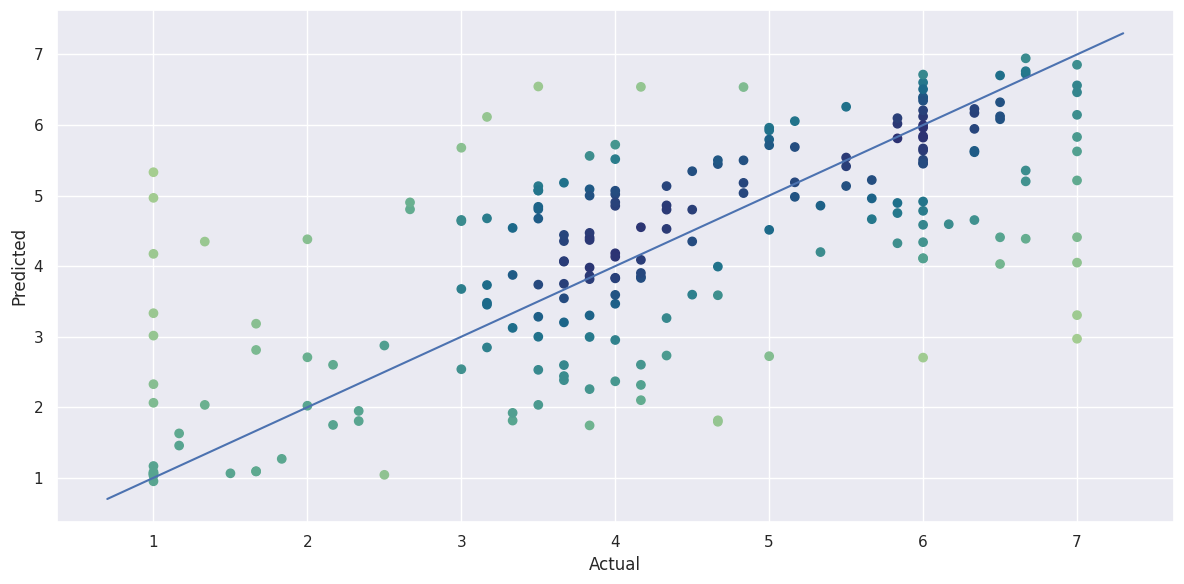

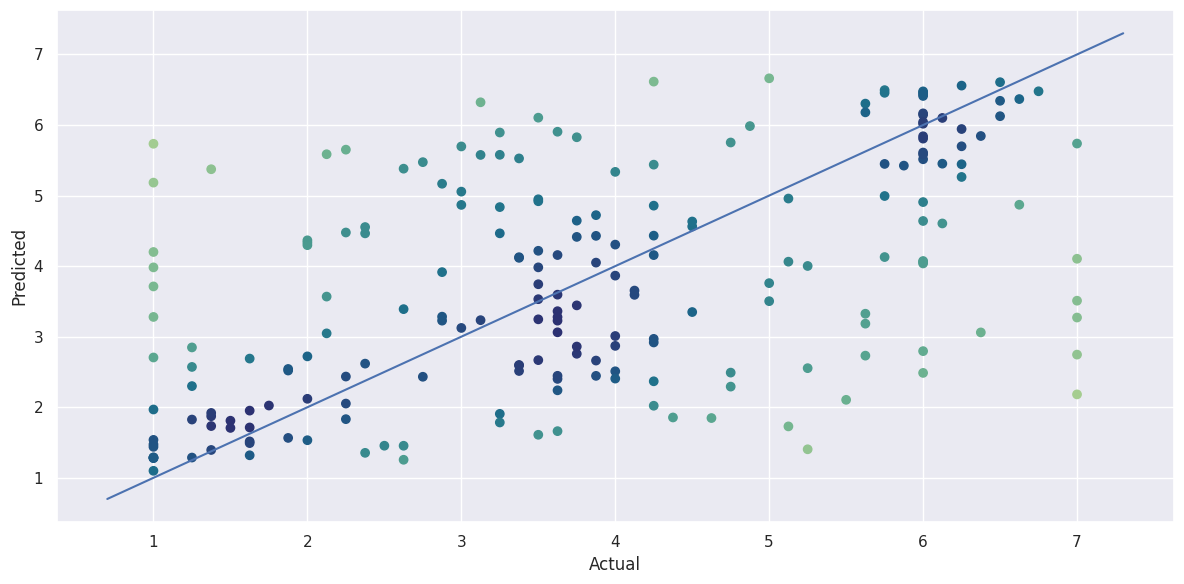

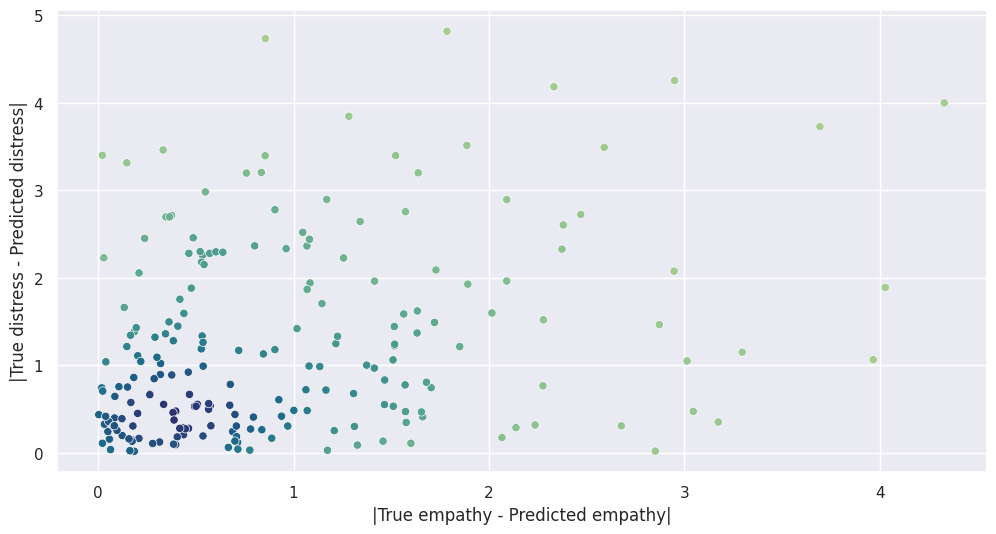

In [31]:
if TASK == "EMO":
  fig_name = "confusion_matrix"
  plot_confusion_matrix(golds=golds,
                        predictions=predictions,
                        path= f"{path_tosave}/{fig_name}.png"
                        )
  print("\n")
  fig_name = "confusion_matrix_per_emotions"
  plot_confusion_matrix_per_emotions(gold_emotions = golds,
                                     predicted_emotions = predictions,
                                     path= f"{path_tosave}/{fig_name}.png"
                                     )

if TASK == "EMP":
  fig_name = f"empathy_true_vs_predicted"
  plot_true_vs_predicted(golds = golds[:,0],
                        predictions = predictions[:,0],
                        path= f"{path_tosave}/{fig_name}.png"
                        )
  print("\n")
  fig_name = f"distress_true_vs_predicted"
  plot_true_vs_predicted(golds = golds[:,1],
                        predictions = predictions[:,1],
                        path= f"{path_tosave}/{fig_name}.png"
                        )
  print("\n")
  fig_name = f"abs_diff_true_vs_predicted"
  plot_abs_diff_emp(golds = golds,
                        predictions = predictions,
                        path= f"{path_tosave}/{fig_name}.png"
                        )

## Inference

In [32]:
def load_checkpoint_and_compute_metrics(checkpoint_path, test_set):

  model = AutoModelForSequenceClassification.from_pretrained(checkpoint_path,
                                                          problem_type = problem_type,
                                                          num_labels = config.get('num_labels'),
                                                          classifier_dropout = config.get('dropout'),
                                                          ignore_mismatched_sizes=True)
  trainer = Trainer(model=model)
  # Perform prediction using the loaded checkpoint
  outs = trainer.predict(test_set)

  if TASK == "EMO":
    golds = label_encoder.decode(outs.label_ids)
    predictions = predict_emotions(outs.predictions, golds)
  if TASK == "EMP":
    golds = outs.label_ids
    predictions = outs.predictions

  path_predictions = f"{path_tosave}/predictions_best_metric.tsv"
  path_metrics = f"{path_tosave}/dev_metrics_best_metric.json"

  #write_predictions(predictions, path_predictions)
  challenge_metrics = compute_metrics(golds=golds, predictions=predictions, task=TASK)

  #write_dict_to_json(challenge_metrics, path_metrics)

  print(challenge_metrics)


In [44]:
best_metric_path = f"/content/{config.get('model_name')}/checkpoint-1650"
print(best_metric_path)
load_checkpoint_and_compute_metrics(best_metric_path, dev_set)

/content/roberta-base/checkpoint-1650


OSError: ignored

## Save on Google Drive

In [33]:
# move the best checkpoint in the folder with model id
best_model_path = trainer.state.best_model_checkpoint

!mv $best_model_path /content/$path_tosave

In [ ]:
# move the checkpoint with best metric in the folder with model id
!mv $best_metric_path /content/$path_tosave

In [34]:
# move the results to personal drive
!mv /content/$path_tosave /content/drive/MyDrive/hlt

## Test

In [35]:
model_to_test_path = "/content/drive/MyDrive/hlt/EMP_roberta_baseline3/checkpoint-1650"

In [ ]:
TEST_DATA = f"{repo_path}{branch}/datasets/WASSA23_essay_level_test_preproc.tsv"
test_df = pd.read_csv(TEST_DATA, sep='\t')

test_set = WASSADataset(tokenizer=tokenizer,
                    essay=test_df.essay,
                    targets = None
                )

model = AutoModelForSequenceClassification.from_pretrained(model_to_test_path,
                                                          problem_type = problem_type,
                                                          num_labels = config.get('num_labels'),
                                                          classifier_dropout = config.get('dropout'),
                                                          ignore_mismatched_sizes=True)
trainer = Trainer(model=model)


outs = trainer.predict(test_set)

if TASK == "EMO":
  golds = label_encoder.decode(outs.label_ids)
  predictions = predict_emotions(outs.predictions, golds)
if TASK == "EMP":
  golds = outs.label_ids
  predictions = outs.predictions

In [43]:
path_predictions = "predictions_best_metric.tsv"
write_predictions(predictions, path_predictions)

## Test

In [ ]:
TASK = "EMO"
num_labels = 8

model_to_test_path = "/content/drive/MyDrive/hlt/EMO_roberta_baseline_nostop/checkpoint-2100"

TEST_DATA = f"{repo_path}{branch}/datasets/WASSA23_essay_level_test_preproc.tsv"
test_df = pd.read_csv(TEST_DATA, sep='\t')

test_set = WASSADataset(tokenizer=tokenizer,
                    essay=test_df.essay,
                    targets = None
                )

model = AutoModelForSequenceClassification.from_pretrained(model_to_test_path, 
                                                          problem_type = problem_type,
                                                          num_labels = 8 , 
                                                          classifier_dropout = config.get('dropout'),
                                                          ignore_mismatched_sizes=True)
trainer = Trainer(model=model)


outs = trainer.predict(test_set)

if TASK == "EMO":
  label_encoder = EmotionsLabelEncoder()
  label_encoder.fit(train_df.emotion)
  predictions = predict_emotions(outs.predictions)
if TASK == "EMP":
  golds = outs.label_ids
  predictions = outs.predictions

path_predictions = f"predictions_{TASK}.tsv"
write_predictions(predictions, path_predictions)

from google.colab import files
files.download(path_predictions) 